In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

data.data.shape

(569, 30)

In [2]:
lr1 = LR(penalty='l1',C=0.5)        #正则化

In [3]:
lr2 = LR(penalty='l2',C=0.5)

In [9]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,
                                          random_state=420)

In [6]:
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lr1.fit(Xtrain,Ytrain)
lr1.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 2.65293985,  0.07641569, -0.02676073, -0.01015152,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.03418821,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.03289765, -0.21061242, -0.22511847, -0.01973078,  0.        ,
         0.        , -0.05206117,  0.        ,  0.        ,  0.        ]])

In [7]:
lr2.fit(Xtrain,Ytrain)
lr2.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 1.23709717,  0.14025709,  0.13236034, -0.00924288, -0.04875269,
        -0.21957892, -0.32478884, -0.14975872, -0.08865506, -0.00642779,
         0.04760916,  0.37442816,  0.15284278, -0.06302519, -0.00644752,
        -0.03104989, -0.06388473, -0.02248161, -0.01171476, -0.00145322,
         1.27667721, -0.26764674, -0.21346943, -0.01935458, -0.09162881,
        -0.62849093, -0.85139493, -0.30064056, -0.18541248, -0.04586486]])

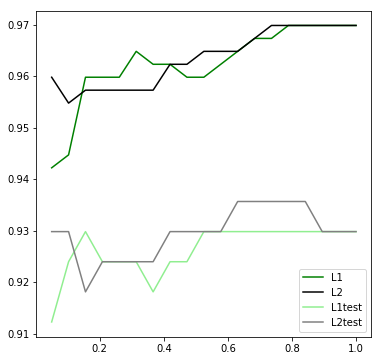

In [10]:
l1 = []
l2 = []
l1test = []
l2test = []

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)    #liblinear(l1只能用这个坐标下降,小数据),newton-cg,sag(数据量特别大，大于100000),lbfgs(特征多大数据，用后面三种)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]    

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


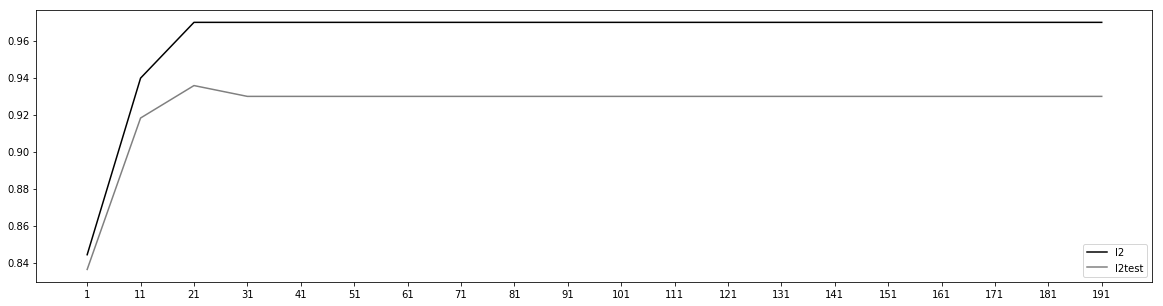

In [12]:
l2 = []
l2test=[]

for i in np.arange(1,201,10):
    lr2 = LR(penalty='l2',C=0.9,max_iter=i,solver='liblinear')
    lr2.fit(Xtrain,Ytrain)
    l2.append(lr2.score(Xtrain,Ytrain))
    l2test.append(lr2.score(Xtest,Ytest))

graph=[l2,l2test]
color=['black','gray']
label=['l2','l2test']
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [13]:
lr2.n_iter_

array([24], dtype=int32)